In [22]:
# Packages
import numpy as np
import sklearn 
import pandas as pd
import matplotlib.pyplot as plt

from utility_code.utility import utils

In [23]:
#import csvs
train_import = pd.read_csv("ucla2020-cs145-covid19-prediction/train.csv")
test_import = pd.read_csv("ucla2020-cs145-covid19-prediction/test.csv")
graph = pd.read_csv("ucla2020-cs145-covid19-prediction/graph.csv")

train_import['Norm_Incident'] = train_import['Incident_Rate']/train_import['Testing_Rate']
train_import['Norm_Confirmed'] = train_import['Confirmed']/train_import['Testing_Rate']

In [24]:
#only look at the features in features list
features = ['Norm_Incident', 'Norm_Confirmed', 'Testing_Rate']
num_features = len(features)

train_import

ID  Province_State        Date  Confirmed  Deaths  Recovered  \
0        0         Alabama  04-12-2020       3563      93        NaN   
1        1          Alaska  04-12-2020        272       8       66.0   
2        2         Arizona  04-12-2020       3542     115        NaN   
3        3        Arkansas  04-12-2020       1280      27      367.0   
4        4      California  04-12-2020      22795     640        NaN   
5        5        Colorado  04-12-2020       7307     289        NaN   
6        6     Connecticut  04-12-2020      12035     554        NaN   
7        7        Delaware  04-12-2020       1625      35      191.0   
8        8         Florida  04-12-2020      19895     461        NaN   
9        9         Georgia  04-12-2020      12452     433        NaN   
10      10          Hawaii  04-12-2020        499       9      300.0   
11      11           Idaho  04-12-2020       1407      27        NaN   
12      12        Illinois  04-12-2020      20852     720        NaN   
13      13         Indiana  04-12-2020       7928     343        NaN   
14      14            Iowa  04-12-2020       1587      41      674.0   
15      15          Kansas  04-12-2020       1344      56        NaN   
16      16        Kentucky  04-12-2020       1963      97      464.0   
17      17       Louisiana  04-12-2020      20595     840        NaN   
18      18           Maine  04-12-2020        633      19      266.0   
19      19        Maryland  04-12-2020       8225     236      456.0   
20      20   Massachusetts  04-12-2020      25475     756        NaN   
21      21        Michigan  04-12-2020      24244    1479      433.0   
22      22       Minnesota  04-12-2020       1621      70      842.0   
23      23     Mississippi  04-12-2020       2781      96        NaN   
24      24        Missouri  04-12-2020       4269     118        NaN   
25      25         Montana  04-12-2020        387       6      169.0   
26      26        Nebraska  04-12-2020        791      17        NaN   
27      27          Nevada  04-12-2020       2836     112        NaN   
28      28   New Hampshire  04-12-2020        929      23      236.0   
29      29      New Jersey  04-12-2020      61850    2350        NaN   
30      30      New Mexico  04-12-2020       1245      26      235.0   
31      31        New York  04-12-2020     189033    9385    23887.0   
32      32  North Carolina  04-12-2020       4570      89        NaN   
33      33    North Dakota  04-12-2020        308       7      121.0   
34      34            Ohio  04-12-2020       6604     253        NaN   
35      35        Oklahoma  04-12-2020       1970      96      865.0   
36      36          Oregon  04-12-2020       1527      52        NaN   
37      37    Pennsylvania  04-12-2020      22938     557        NaN   
38      38    Rhode Island  04-12-2020       2665      63       35.0   
39      39  South Carolina  04-12-2020       3320      82        NaN   
40      40    South Dakota  04-12-2020        730       6      197.0   
41      41       Tennessee  04-12-2020       5508     106     1504.0   
42      42           Texas  04-12-2020      13677     283     2014.0   
43      43            Utah  04-12-2020       2303      18        NaN   
44      44         Vermont  04-12-2020        727      27       15.0   
45      45        Virginia  04-12-2020       5274     141        NaN   
46      46      Washington  04-12-2020      10609     506        NaN   
47      47   West Virginia  04-12-2020        593       6       83.0   
48      48       Wisconsin  04-12-2020       3341     144        NaN   
49      49         Wyoming  04-12-2020        270       0      137.0   
50      50         Alabama  04-13-2020       3734      99        NaN   
51      51          Alaska  04-13-2020        277       8       85.0   
52      52         Arizona  04-13-2020       3705     122        NaN   
53      53        Arkansas  04-13-2020       1410      29      391.0   
54      54      California  04-13-2020      2393

In [25]:
#array of states
states = pd.Series.unique(train_import['Province_State'])
num_states = len(states)

In [26]:
#split training into training and testing
PERCENT_TRAIN = 80
train , test = utils.split_dataframe(train_import,PERCENT_TRAIN,num_states)

In [27]:
#stratify by state (into state dictionary)
statesdata = {}
for s in states:
    statesdata[s] = train.loc[train['Province_State'] == s ,features]
    
#feature name -> column indices
state_feature_indices = utils.get_column_indices(statesdata['California'],features)

In [28]:
#set the WINDOW size
WINDOW_SIZE = 4

In [29]:
#append the feature spaces from the W days prior (where W is the window length)
new_features = []
for day in range(WINDOW_SIZE):
    for f in features:
        new_features.append(f + "(-"+ str(WINDOW_SIZE-day) + " days)")
all_new_features = new_features + features

In [30]:
from itertools import chain

#fill the knn data using days from training set
workingdata = pd.DataFrame(columns = all_new_features)
num_training_days = len(statesdata['California'])

#fill the table
for d in range(WINDOW_SIZE,num_training_days):
    for s in states:
        workingdata_row_index = workingdata.shape[0]
        workingdata_row = utils.flatten_dataframe(statesdata[s],slice(d-WINDOW_SIZE,d+1), state_feature_indices)
        utils.dataframe_append_row(workingdata,workingdata_row,s,d)     

In [ ]:
#number of nearest neighbors
#K_NEIGHBORS = 2

#number of days to predict in the future (for now let's predict for entirety of test labels)
NUM_DAYS_INTO_FUTURE = int(test.shape[0] / num_states)
workingdata.iloc[:,workingdata.shape[1]-num_features:]

Norm_Incident Norm_Confirmed Testing_Rate
Alabama (day 4)               0.119398        5.59843       776.11
Alaska (day 4)               0.0343446       0.205294      1461.32
Arizona (day 4)               0.089392        6.50659      651.186
Arkansas (day 4)             0.0714443        1.84971      875.812
California (day 4)            0.112325        44.0413      628.433
Colorado (day 4)              0.204426        11.5844       715.27
Connecticut (day 4)            0.29901        10.6606      1489.98
Delaware (day 4)              0.155056        1.50988      1370.97
Florida (day 4)               0.106468         22.606       1032.6
Georgia (day 4)               0.230633        23.3848       670.05
Hawaii (day 4)               0.0256039       0.362496      1462.09
Idaho (day 4)                 0.100246        1.61446      982.988
Illinois (day 4)              0.209921        24.6356      1044.59
Indiana (day 4)               0.186677        12.2161      781.098
Iowa (day 4)                  0.103555        2.71388      788.907
Kansas (day 4)                0.100174        2.44272      661.147
Kentucky (day 4)             0.0859695          2.943      827.388
Louisiana (day 4)             0.177998        8.18302      2753.51
Maine (day 4)                0.0535234       0.628368      1266.77
Maryland (day 4)              0.183267        10.8922      990.067
Massachusetts (day 4)         0.228602        15.6907      2050.96
Michigan (day 4)              0.305549        24.3439      1183.42
Minnesota (day 4)            0.0434073        2.14712      842.524
Mississippi (day 4)          0.0943381        2.73128      1326.85
Missouri (day 4)              0.102156        5.98579      864.381
Montana (day 4)              0.0417673       0.361699      1147.36
Nebraska (day 4)             0.0774361        1.18111       806.02
Nevada (day 4)                0.112966        3.40785      943.118
New Hampshire (day 4)        0.0936216        1.24343      916.012
New Jersey (day 4)            0.496061        44.0611      1709.38
New Mexico (day 4)           0.0444391       0.741037       2002.6
New York (day 4)              0.406283        68.5035      3265.39
North Carolina (day 4)       0.0795155        7.88625      715.042
North Dakota (day 4)         0.0335783       0.203625      1930.02
Ohio (day 4)                  0.112427        12.5624      669.777
Oklahoma (day 4)             0.0762808        2.79007      844.781
Oregon (day 4)                0.049688        1.99104      871.908
Pennsylvania (day 4)          0.199746         25.143      1123.89
Rhode Island (day 4)          0.125748        1.33213      2649.14
South Carolina (day 4)        0.113178        5.70413       689.15
South Dakota (day 4)          0.124265       0.914459      1433.63
Tennessee (day 4)            0.0749568        4.92086      1295.51
Texas (day 4)                 0.106442        24.4651      689.798
Utah (day 4)                 0.0540078         1.5478      1733.43
Vermont (day 4)              0.0672634       0.410704      1884.57
Virginia (day 4)              0.148329        11.7287      587.361
Washington (day 4)           0.0889663        6.71643      1646.26
West Virginia (day 4)        0.0397684       0.526135      1383.68
Wisconsin (day 4)             0.086401        4.47088      866.719
Wyoming (day 4)              0.0460557       0.229007      1292.53
Alabama (day 5)               0.120773         5.6629      807.183
Alaska (day 5)               0.0326984       0.195454      1580.93
Arizona (day 5)              0.0916311        6.66957      676.355
Arkansas (day 5)             0.0721461        1.86788      907.445
California (day 5)            0.112662        44.1733      660.059
Colorado (day 5)               0.20777        11.7739      738.157
Connecticut (day 5)           0.303072        10.8054      1555.61
Delaware (day 5)              0.173558        1.69005      1370.97
Florida (day 5)               0.105431        22.3857      1106.02
Georg

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=5, random_state=0)
#rf.fit(workingdata.iloc[:,:-1 * num_features], workingdata.iloc[:,workingdata.shape[1]-num_features:])

#get rid of previously predicted rows
workingdata = workingdata.iloc[:(num_training_days - WINDOW_SIZE)*num_states,:]

#feature name -> column indices
workingdata_feature_indices = utils.get_column_indices(workingdata,features)

#build table for next NUM_DAYS_INTO_FUTURE entries
for d in range(num_training_days,num_training_days + NUM_DAYS_INTO_FUTURE):
    
    #refit the model after every day
    rf.fit(workingdata.iloc[:,:-1 * num_features], workingdata.iloc[:,workingdata.shape[1]-num_features:])
    
    for s in states:
        #get rows for past WINDOW_SIZE days
        
        row_indicies = slice(workingdata.shape[0] - num_states * WINDOW_SIZE, workingdata.shape[0], num_states)
        rf_row_features = utils.flatten_dataframe(workingdata,row_indicies,slice(-1 * num_features,None,None))
        #find nearest neighbors based on these features
#         if d == num_training_days:
#             print(rf_row_features)
        #knn_ret = knn.kneighbors([knn_row_features])[1][0]
        rf_ret = rf.predict([rf_row_features])[0]
#         if d == num_training_days:
#             print(rf_ret)
        # rf_ret_df = workingdata.iloc[rf_ret,-1 * num_features:]
        #interpolate btwn the labels in the df
        #for f in range(num_features):
        rf_row_features.extend(rf_ret.tolist())
        
#         if d == num_training_days:
#             print(rf_row_features)
            
        utils.dataframe_append_row(workingdata,rf_row_features,s,d)     

In [ ]:
#analyze labels vs predictions
pd.set_option("display.max_rows", None, "display.max_columns", None)
predictions = workingdata.iloc[(num_training_days - WINDOW_SIZE)*num_states:,-1 * num_features:]
labels = utils.dataframe_copy_rows_and_filter_columns(test,predictions)
errors = predictions.subtract(labels)



In [ ]:
print('average errors: ', errors.divide(labels).abs().mean(axis = 0))

In [168]:
errors.divide(labels).abs()

Confirmed       Deaths
Alabama (day 113)          0.00555738      1.59316
Alaska (day 113)             0.440539      1.25982
Arizona (day 113)          0.00710534      1.78358
Arkansas (day 113)         0.00680005      3.83926
California (day 113)        0.0378046    0.0708113
Colorado (day 113)          0.0293787     0.297184
Connecticut (day 113)       0.0285581     0.449878
Delaware (day 113)          0.0239216    0.0873451
Florida (day 113)          0.00621763     0.162925
Georgia (day 113)           0.0238488     0.230922
Hawaii (day 113)             0.236455       1.1729
Idaho (day 113)             0.0294829      2.65417
Illinois (day 113)          0.0264014     0.340449
Indiana (day 113)           0.0153844    0.0780433
Iowa (day 113)              0.0102204      1.64633
Kansas (day 113)           0.00542021      1.98094
Kentucky (day 113)          0.0334957     0.787497
Louisiana (day 113)         0.0144604     0.332969
Maine (day 113)              0.144782    0.0927228
Maryland (day 113)          0.0208698     0.200096
Massachusetts (day 113)    0.00811355     0.359011
Michigan (day 113)           0.019342     0.335808
Minnesota (day 113)          0.016994     0.477072
Mississippi (day 113)       0.0421132     0.721109
Missouri (day 113)          0.0174747       0.8973
Montana (day 113)            0.191719      1.69905
Nebraska (day 113)          0.0230103      2.20197
Nevada (day 113)            0.0490141      1.87237
New Hampshire (day 113)     0.0262098     0.460834
New Jersey (day 113)        0.0173046     0.322122
New Mexico (day 113)       0.00804267     0.111505
New York (day 113)          0.0282071     0.113646
North Carolina (day 113)    0.0118122       1.5412
North Dakota (day 113)      0.0441499      1.14126
Ohio (day 113)             0.00897144     0.222985
Oklahoma (day 113)          0.0234359      1.94673
Oregon (day 113)           0.00930495       1.0617
Pennsylvania (day 113)     0.00765331     0.222102
Rhode Island (day 113)      0.0156796     0.336148
South Carolina (day 113)    0.0130143      1.39561
South Dakota (day 113)      0.0399925      1.26354
Tennessee (day 113)        0.00657478      4.43359
Texas (day 113)            0.00864878    0.0597479
Utah (day 113)              0.0545328      5.93312
Vermont (day 113)            0.309852   0.00885201
Virginia (day 113)          0.0113279     0.936578
Washington (day 113)       0.00369628     0.636934
West Virginia (day 113)     0.0705872     0.921643
Wisconsin (day 113)        0.00247885      1.56442
Wyoming (day 113)            0.343694      1.09242
Alabama (day 114)           0.0117819      1.59792
Alaska (day 114)             0.449276      1.25982
Arizona (day 114)           0.0153889       1.9207
Arkansas (day 114)         0.00453947      3.73042
California (day 114)        0.0595844     0.106493
Colorado (day 114)          0.0536562     0.277202
Connecticut (day 114)       0.0753822     0.451998
Delaware (day 114)           0.033329    0.0942355
Florida (day 114)           0.0166825     0.125801
Georgia (day 114)           0.0404513     0.252042
Hawaii (day 114)             0.278596      1.09242
Idaho (day 114)             0.0541866      2.48016
Illinois (day 114)          0.0439493     0.493996
Indiana (day 114)           0.0284511    0.0715239
Iowa (day 114)              0.0228419      1.61025
Kansas (day 114)            0.0103175      2.00961
Kentucky (day 114)          0.0676238     0.899133
Louisiana (day 114)         0.0163704     0.290987
Maine (day 114)              0.530008     0.540688
Maryland (day 114)          0.0321378     0.226103
Massachusetts (day 114)     0.0284429     0.380401
Michigan (day 114)          0.0351461     0.311311
Minnesota (day 114)         0.0326857     0.466798
Mississippi (day 114)       0.0719139     0.805385
Missouri (day 114)          0.0141276     0.886541
Montana (day 114)            0.503348        2.513
Nebraska (day 114)          0.0326288       2.2552
Nevada (day 114)            0.0546005      1.81905

<function matplotlib.pyplot.show>

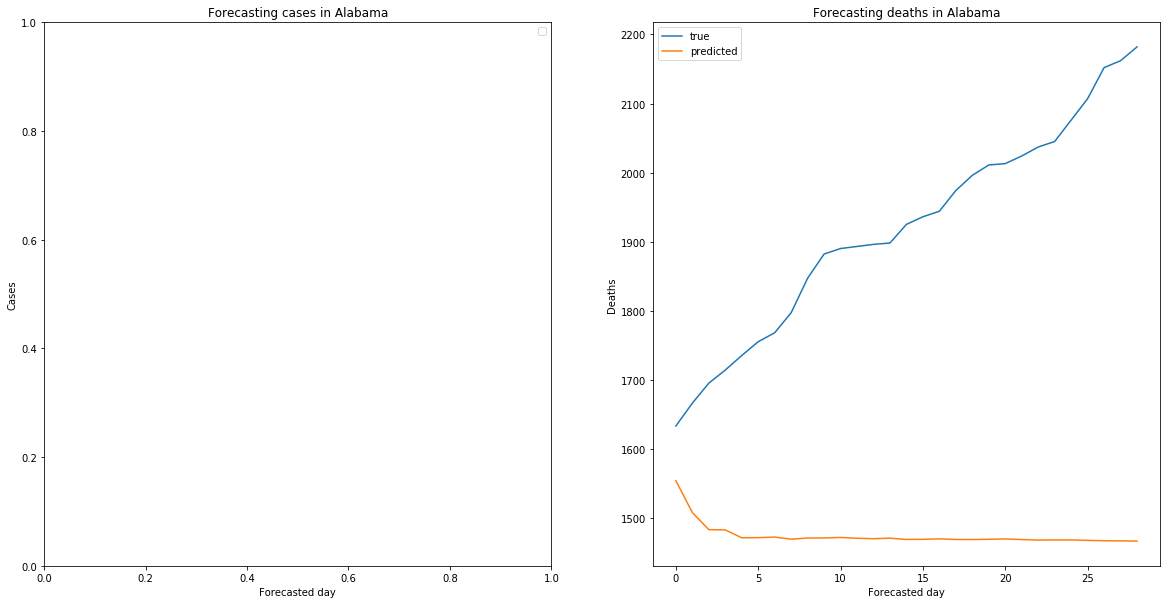

In [212]:
days = list(range(NUM_DAYS_INTO_FUTURE))
ala_inds = [0 + 50*i for i in range(NUM_DAYS_INTO_FUTURE)]
alabama_true = labels.iloc[ala_inds]
alabama_pred = predictions.iloc[ala_inds]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
#ax1.plot(days, alabama_true['Confirmed'])
#ax1.plot(days, alabama_pred['Confirmed'])
ax2.plot(days, alabama_true['Deaths'])
ax2.plot(days, alabama_pred['Deaths'])
ax2.legend(['true', 'predicted'])
ax1.legend(['true', 'predicted'])
ax1.set_xlabel('Forecasted day')
ax1.set_ylabel('Cases')
ax2.set_xlabel('Forecasted day')
ax2.set_ylabel('Deaths')
ax1.set_title('Forecasting cases in Alabama')
ax2.set_title('Forecasting deaths in Alabama')
f.set_figheight(10)
f.set_figwidth(20)
#plt.savefig("MidtermReportFigs/ala_forecasts.png")
plt.show

<function matplotlib.pyplot.show>

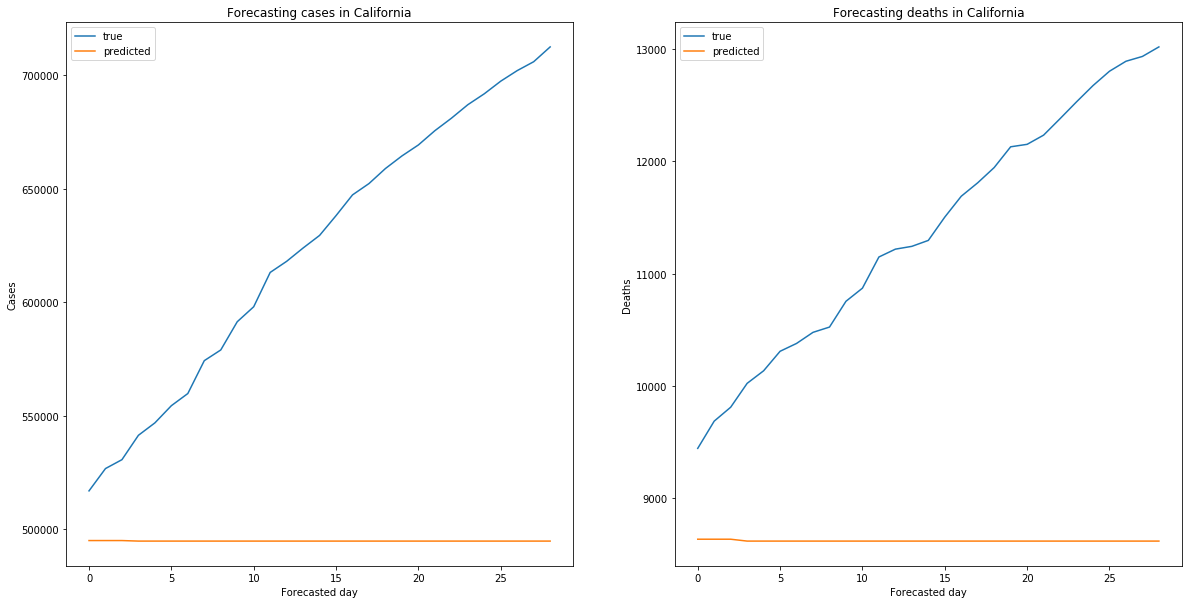

In [184]:
days = list(range(NUM_DAYS_INTO_FUTURE))
calif_inds = [4 + 50*i for i in range(NUM_DAYS_INTO_FUTURE)]
calif_true = labels.iloc[calif_inds]
calif_pred = predictions.iloc[calif_inds]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(days, calif_true['Confirmed'])
ax1.plot(days, calif_pred['Confirmed'])
ax2.plot(days, calif_true['Deaths'])
ax2.plot(days, calif_pred['Deaths'])
ax2.legend(['true', 'predicted'])
ax1.legend(['true', 'predicted'])
ax1.set_xlabel('Forecasted day')
ax1.set_ylabel('Cases')
ax2.set_xlabel('Forecasted day')
ax2.set_ylabel('Deaths')
ax1.set_title('Forecasting cases in California')
ax2.set_title('Forecasting deaths in California')
f.set_figheight(10)
f.set_figwidth(20)
plt.show
#plt.savefig("MidtermReportFigs/calif_forecasts.png")